In [1]:
import pandas as pd
import json
import os
import datetime
import pprint
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline
import matplotlib.pyplot as plt
# The two statemens below are used mainly to set up a plotting
# default style that's better than the default from matplotlib
import seaborn as sns
plt.style.use('bmh')

In [2]:
json_dir = os.path.join("scripts", "taxi-test")
json_filenames = []
for(dirpath,dirnames,filenames) in os.walk(json_dir):
    json_filenames.extend(filenames)
    break
json_filenames.sort()

In [3]:
json_path = os.path.join(json_dir, json_filenames[0])
with open(json_path, 'r') as f:
    jo = json.load(f)
    pprint.pprint(jo)

{'crs': {'properties': {'href': 'http://spatialreference.org/ref/epsg/4326/ogcwkt/',
                        'type': 'ogcwkt'},
         'type': 'link'},
 'features': [{'geometry': {'coordinates': [[103.61642, 1.27202],
                                            [103.63875, 1.34467],
                                            [103.64106, 1.31619],
                                            [103.64829, 1.3292],
                                            [103.65052, 1.32126],
                                            [103.65508, 1.30304],
                                            [103.66338, 1.32346],
                                            [103.66678, 1.30121],
                                            [103.66689, 1.31226],
                                            [103.66718, 1.30119],
                                            [103.6702, 1.32946],
                                            [103.67671, 1.32743],
                                            [103.67845, 

In [4]:
df = gpd.read_file(json_path)
print(df.columns.values)
print(df.head())
print(type(df))
print(type(df.ix[0])) #the GeoDataFrame is composed of pandas Series objects instead of geopandas GeoSeries objects...

['api_info' 'geometry' 'taxi_count' 'timestamp']
                api_info                                           geometry  \
0  {'status': 'healthy'}  (POINT (103.61642 1.27202), POINT (103.63875 1...   

   taxi_count            timestamp  
0        4101  2016-11-26T12:04:39  
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.series.Series'>


In [5]:
series = gpd.GeoSeries(df.ix[0])
print(series['geometry'].bounds) #minx, miny, maxx, maxy for bounding box to contain multipoint geometry
print(series['geometry'].centroid) #centroid of multipoint geometry

(103.61642, 1.24215, 104.01577, 1.45903)
POINT (103.8582524579372 1.331252013167522)


In [6]:
#import basemap to a GeoDataFrame
planning_areas_filepath = os.path.join('data', 'master-plan-2014-planning-area-boundary-web', 'shp', 'MP14_PLNG_AREA_WEB_PL.shp')
plnarea_df = gpd.read_file(planning_areas_filepath)

  CA_IND  FMEL_UPD_D           INC_CRC  OBJECTID PLN_AREA_C     PLN_AREA_N  \
0      N  2014-12-05  BA616285F402846F         1         BS         BISHAN   
1      N  2014-12-05  FB44C870B04B7F57         2         BK    BUKIT BATOK   
2      N  2014-12-05  738B479882E4EE28         3         BM    BUKIT MERAH   
3      N  2014-12-05  4A9C6E6BAF7BE998         4         BP  BUKIT PANJANG   
4      N  2014-12-05  C893AEAD20F42559         5         BT    BUKIT TIMAH   

  REGION_C        REGION_N    SHAPE_Area    SHAPE_Leng      X_ADDR  \
0       CR  CENTRAL REGION  7.618921e+06  13517.121556  28789.7630   
1       WR     WEST REGION  1.113326e+07  15234.223423  19255.4150   
2       CR  CENTRAL REGION  1.446247e+07  29156.293788  26865.7838   
3       WR     WEST REGION  9.019940e+06  15891.853279  21287.0436   
4       CR  CENTRAL REGION  1.752665e+07  22492.840844  23256.7643   

       Y_ADDR                                           geometry  
0  37450.8865  POLYGON ((103.8492429187323 

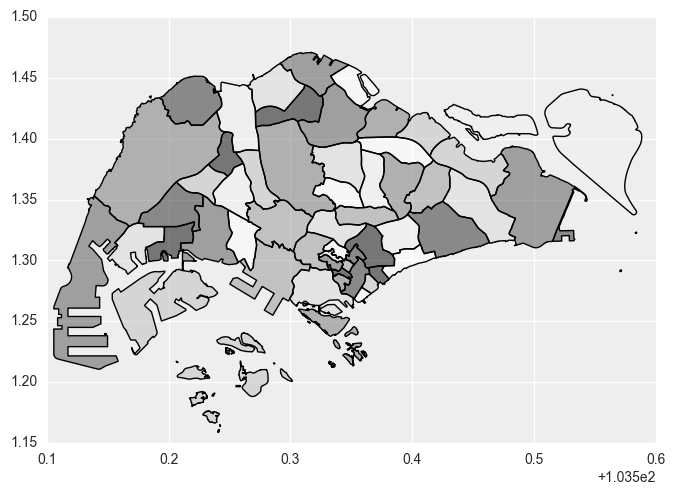

In [7]:
print(plnarea_df.head())
ax=plnarea_df.plot()

In [8]:
#questions:
#Which areas are the most dependent on taxis for commuting?
#What events affect taxi distribution? (historic events in transport during data timeline)
#what types of places attract the most taxis?

#to be generated: 
#matrix of planning area to taxi count by time
#matrix of POI to taxi count within buffer, by time

#dependent variable - taxi positions/count at location
#final matrix features:
#





#presentation format:
#1. data exploration
#2. question formation
#3. data engineering
#4. ML
#5. visualization
#6. interpretation

In [9]:
%%time
#testdf = pd.concat(map(gpd.read_file, glob.glob('scripts/taxi-test/*.geojson')))
dflist_test = []
jsondir = os.path.join('scripts', 'taxi-test')
for (dirpath,dirnames,filenames) in os.walk(jsondir, topdown=False):
    for file in filenames:
        try:
            thisjsondf = gpd.read_file(os.path.join(jsondir, file))
            dflist_test.append(thisjsondf)
        except OSError as err:
            print('Empty API response file: ' + file)
            continue

Empty API response file: 2016-11-27T08_00_00.geojson
Empty API response file: 2016-11-28T08_00_00.geojson
Empty API response file: 2016-11-29T08_00_00.geojson
Empty API response file: 2016-11-30T08_00_00.geojson
Empty API response file: 2016-11-30T08_25_00.geojson
Empty API response file: 2016-11-30T08_30_00.geojson
Empty API response file: 2016-12-01T08_00_00.geojson
Empty API response file: 2016-12-02T08_00_00.geojson
Empty API response file: 2016-12-03T08_00_00.geojson
Wall time: 23min 25s


In [10]:
#df_test = gpd.GeoDataFrame(pd.concat(dflist_test, ignore_index=True))
df_test = dflist_test[0]
#it's called a list comprehension, not a dataframe comprehension. This gets garbled and generates a list of dataframes.
#df_test = [df_test.append(nextdf) for nextdf in dflist_test[1:]]
for geodataframe in dflist_test[1:]:
    df_test = df_test.append(geodataframe, ignore_index=True)
print(len(df_test))
df_test.head()

2007


,api_info,geometry,taxi_count,timestamp
0,{'status': 'healthy'},"(POINT (103.61642 1.27202), POINT (103.63875 1...",4101,2016-11-26T12:04:39
1,{'status': 'healthy'},"(POINT (103.62552 1.28943), POINT (103.62917 1...",3985,2016-11-26T12:09:40
2,{'status': 'healthy'},"(POINT (103.62678 1.2948), POINT (103.64782 1....",3979,2016-11-26T12:14:40
3,{'status': 'healthy'},"(POINT (103.6268 1.313191), POINT (103.62704 1...",3874,2016-11-26T12:19:40
4,{'status': 'healthy'},"(POINT (103.62407 1.30138), POINT (103.62702 1...",3920,2016-11-26T12:24:41


In [11]:
# def prevdelta(timestampstr):
#     dateformat = '%Y-%m-%dT%H:%M:%S'
#     thistime = datetime.datetime.strptime(timestampstr, dateformat)
#     prevtime = datetime.datetime.strptime(timestampstr, dateformat).shift().fillna(0)
#     timedelta = thistime - prevtime
#     return timedelta.total_seconds

def todatetime(timestampstr):
    dateformat = '%Y-%m-%dT%H:%M:%S'
    return datetime.datetime.strptime(timestampstr,dateformat)

In [12]:
df_test['datetime'] = df_test['timestamp'].map(lambda x: todatetime(x))
df_test['datetimeshift'] = df_test['datetime'].shift()
df_test['deltaseconds'] = (df_test['datetime'] - df_test['datetimeshift']).fillna(0).map(lambda x: x.total_seconds())
df_test.drop('datetimeshift',inplace=True,axis=1)
df_test.head()

,api_info,geometry,taxi_count,timestamp,datetime,deltaseconds
0,{'status': 'healthy'},"(POINT (103.61642 1.27202), POINT (103.63875 1...",4101,2016-11-26T12:04:39,2016-11-26 12:04:39,0.0
1,{'status': 'healthy'},"(POINT (103.62552 1.28943), POINT (103.62917 1...",3985,2016-11-26T12:09:40,2016-11-26 12:09:40,301.0
2,{'status': 'healthy'},"(POINT (103.62678 1.2948), POINT (103.64782 1....",3979,2016-11-26T12:14:40,2016-11-26 12:14:40,300.0
3,{'status': 'healthy'},"(POINT (103.6268 1.313191), POINT (103.62704 1...",3874,2016-11-26T12:19:40,2016-11-26 12:19:40,300.0
4,{'status': 'healthy'},"(POINT (103.62407 1.30138), POINT (103.62702 1...",3920,2016-11-26T12:24:41,2016-11-26 12:24:41,301.0


In [13]:
df_test.set_index('datetime', inplace=True)
df_test.sort_index(inplace=True)
df_test.drop('api_info', inplace=True, axis=1)

In [14]:
#querying by datetime index
start = df_test.index.searchsorted(datetime.datetime(2016,11,26))
end = df_test.index.searchsorted(datetime.datetime(2016,12,3))
countfluxdf = pd.DataFrame(df_test.ix[start:end,['taxi_count', 'deltaseconds']])

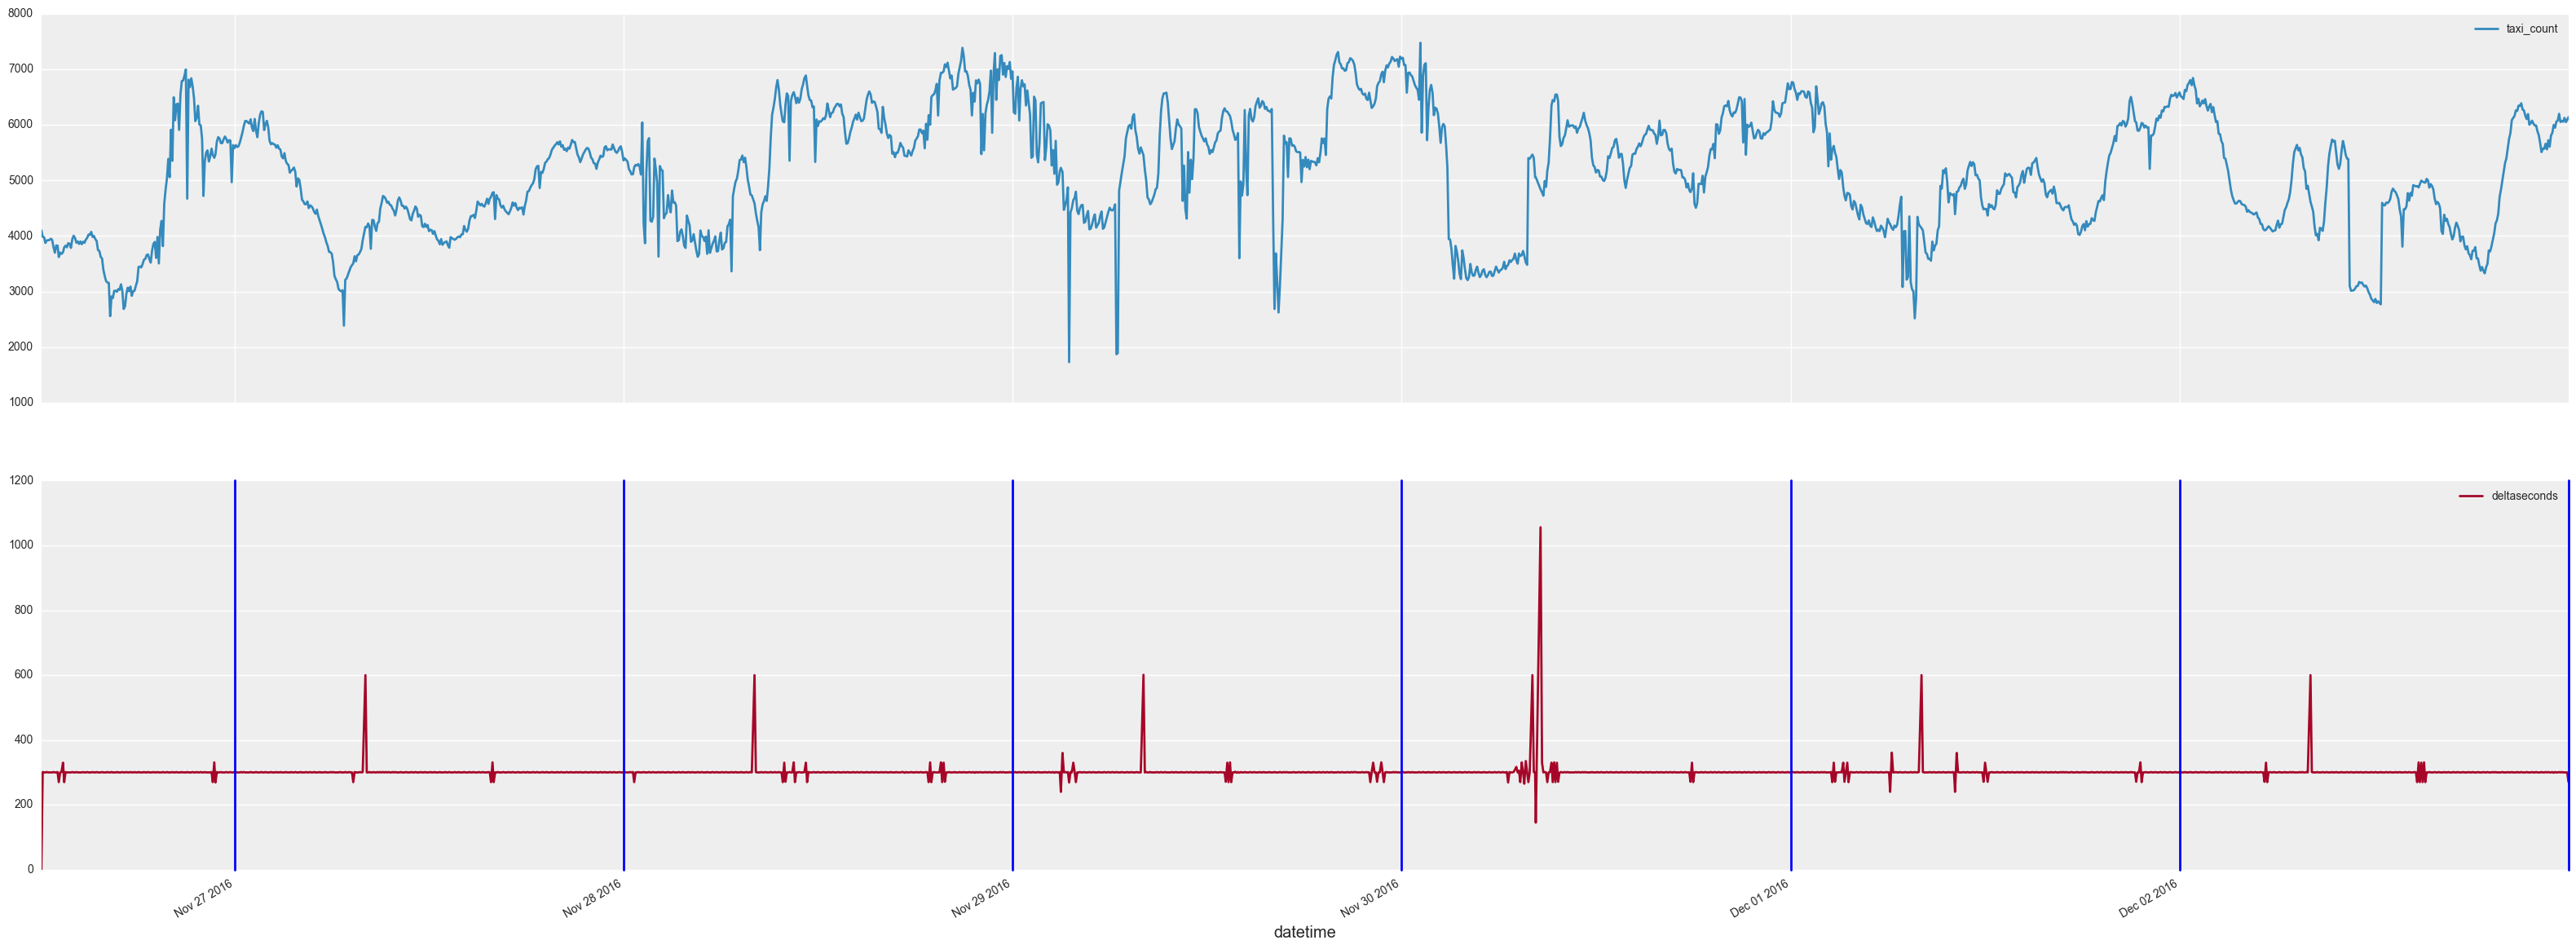

In [15]:
countfluxdf.plot(subplots=True, figsize=(40, 15))
#plt.axvspan(datetime.datetime(2016,11,28), datetime.datetime(2016,11,29), color='red', alpha=0.3)
daylist=[[11,27],[11,28],[11,29],[11,30],[12,1],[12,2],[12,3]]
for day in daylist:
    plt.axvline(x=datetime.datetime(2016,day[0],day[1],0,0,0), clip_on=False)
#plt.savefig('singaporeflux.png', dpi=200)

In [16]:
%%time
# start1 = df_test.index.searchsorted(datetime.datetime(2016,11,27,12))
# end1 = df_test.index.searchsorted(datetime.datetime(2016,11,27,12,15))
flatdf = pd.DataFrame(df_test.ix[:,['geometry']])
# i don't totally understand how this next list comprehension works...
geoflat = pd.DataFrame([[i,x] for i,y in flatdf['geometry'].apply(list).iteritems() for x in y], columns=['datetime', 'taxiloc'])
# geoflat.set_index('datetime', inplace=True) # I don't want to use the datetime as index any more
print(geoflat[:20])
print(type(geoflat['taxiloc'][0]))

              datetime                    taxiloc
0  2016-11-26 12:04:39  POINT (103.61642 1.27202)
1  2016-11-26 12:04:39  POINT (103.63875 1.34467)
2  2016-11-26 12:04:39  POINT (103.64106 1.31619)
3  2016-11-26 12:04:39   POINT (103.64829 1.3292)
4  2016-11-26 12:04:39  POINT (103.65052 1.32126)
5  2016-11-26 12:04:39  POINT (103.65508 1.30304)
6  2016-11-26 12:04:39  POINT (103.66338 1.32346)
7  2016-11-26 12:04:39  POINT (103.66678 1.30121)
8  2016-11-26 12:04:39  POINT (103.66689 1.31226)
9  2016-11-26 12:04:39  POINT (103.66718 1.30119)
10 2016-11-26 12:04:39   POINT (103.6702 1.32946)
11 2016-11-26 12:04:39  POINT (103.67671 1.32743)
12 2016-11-26 12:04:39  POINT (103.67845 1.26646)
13 2016-11-26 12:04:39  POINT (103.68115 1.32978)
14 2016-11-26 12:04:39  POINT (103.6859 1.340364)
15 2016-11-26 12:04:39   POINT (103.6876 1.32079)
16 2016-11-26 12:04:39   POINT (103.688 1.341156)
17 2016-11-26 12:04:39  POINT (103.68894 1.34294)
18 2016-11-26 12:04:39  POINT (103.6895 1.345948)


In [17]:
# flat_test_df =  pd.DataFrame([[i,point] for i,multipoint in df_test['geometry'].apply(list).iteritems() for point in multipoint], columns=['datetime', 'taxiloc'])
# flat_test_df.set_index('datetime', inplace=True)
# sample_joined_flat_df = pd.merge(flat_test_df, df_test, left_index=True, right_index=True, how='left', sort=False, indicator=True)
# flat_df = sample_joined_flat_df[['taxiloc', 'taxi_count', 'deltaseconds']]
# len(flat_df) #10303789 rows

# come to think of it, i don't need the flattened table. 
# I can just refer to taxi_count and deltaseconds whenever i need them, and do spatial operations on the point table

In [18]:
print(len(geoflat))
print(len(plnarea_df))

10303789
55


In [19]:
def point_in_plnarea(point):
    plnareas=[]
    for index, row in plnarea_df.iterrows():
        if type(row['geometry']).__name__ == 'Polygon':
            if point.within(row['geometry']):
                plnareas.append([row['REGION_N'],row['PLN_AREA_N']])
        elif type(row['geometry']).__name__ == 'MultiPolygon':
            contained = False
            for polygon in row['geometry']:
                if point.within(polygon):
                    contained = True
            if contained == True:
                plnareas.append([row['REGION_N'],row['PLN_AREA_N']])
    return plnareas
# for polygon in plnarea_df['geometry'][7]:
#     print(type(polygon).__name__)

In [ ]:
%%time
gfdf_1of4 = gpd.GeoDataFrame(geoflat[:2500000]) #pip-ing this should take about 250 minutes to run
# print(gfdf['taxiloc'][0].within(plnarea_df['geometry'][0]))
gfdf_1of4['plnarea'] = gfdf_1of4['taxiloc'].map(lambda x: point_in_plnarea(x))
print(gfdf_1of4.head())
gfdf_1of4.to_csv('taxi_pip_1of4.csv', encoding='utf-8') #that dataframe took forever to generate, so I'm gonna save it to file 

In [ ]:
%%time
#instead of waiting to write to disk, I'm gonna try writing to disk continuously, 
#catching where it breaks due to Keyboard Interrupt, then resuming from there later on.
